In [46]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import re
from datetime import datetime, timedelta

### Import Raw Data

In [107]:
data = pd.read_csv("./data/sg_hitch_data.csv", index_col=0)
data.head()

,user,post_date,post_time,raw_message,user_type,pick_up,drop_off,request_date,request_date_normalised,request_time,request_time_normalised,day,number_of_pax
0,∆MBROSEEEEE,21.06.2019,21:47:59,👋 hitcher looking for drivers<br/>pick up: the...,hitcher,the midtown,534044,2019-06-21,2019-06-21,21:47,22:00,friday,3
1,Michelley,21.06.2019,21:48:02,👋 hitcher looking for drivers<br/>pick up: nov...,hitcher,"novena square 2,main entrance near jollibee",valley point,2019-06-21,2019-06-21,21:48,22:00,friday,1
2,Charis Koh,21.06.2019,21:48:19,👋 hitcher looking for drivers<br/>pick up: the...,hitcher,the midtown,534044,2019-06-21,2019-06-21,21:48,22:00,friday,3
3,B-,21.06.2019,21:48:21,👋 hitcher looking for drivers<br/>pick up: mar...,hitcher,marsiling 730175,serangoon gardens,2019-06-21,2019-06-21,21:48,22:00,friday,1
4,Galan,21.06.2019,21:48:58,👋 hitcher looking for drivers<br/>pick up: buk...,hitcher,bukit panjang,tai seng,2019-06-21,2019-06-21,21:48,22:00,friday,2


In [108]:
print("Total number of ride requests: ", len(data))

Total number of ride requests:  295083


Number of hitchers: 	 241366 		Percentage:  81.8 %
Number of drivers: 	 53717 		Percentage:  18.2 %


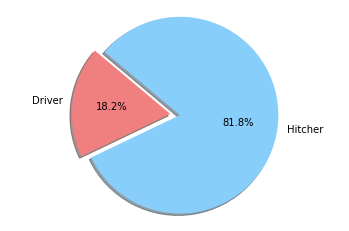

In [109]:
user_type = data['user_type']
user_type_count = Counter(user_type)
print("Number of hitchers: \t", user_type_count['hitcher'], "\t\tPercentage: ", round(user_type_count['hitcher']/len(data)*100, 2), "%")
print("Number of drivers: \t", user_type_count['driver'], "\t\tPercentage: ", round(user_type_count['driver']/len(data)*100, 2), "%")

labels = 'Driver', 'Hitcher'
sizes = [user_type_count['driver'], user_type_count['hitcher']]
colors = ['lightcoral', 'lightskyblue']
explode_driver = 0
explode_hitcher = 0
index = sizes.index(max(sizes))
if index == 0:
    explode_driver = 0.1
else:
    explode_hitcher = 0.1
explode = (explode_driver, explode_hitcher)  # explode max slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [129]:
day_time_frequency = data.groupby(["day", "request_time_normalised"]).size().reset_index(name="count")

In [153]:
time_intervals = data['request_time_normalised'].unique()
time_intervals.sort()
day_intervals = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

day_time_frequency_array = []

for time in time_intervals:
    for day in day_intervals:
        if time == day_time_frequency[]

monday
tuesday
wednesday
thursday
friday
saturday
sunday


In [97]:
source_destination = []

for i in range(len(pick_up)):
    source_destination.append(str(pick_up[i])+" - "+str(drop_off[i]))

In [98]:
Counter(source_destination).most_common(20)

[('town - anywhere', 407),
 ('yishun - anywhere', 348),
 ('woodlands - anywhere', 320),
 ('yishun - woodlands', 271),
 ('woodlands - yishun', 227),
 ('jurong - anywhere', 216),
 ('tampines - yishun', 214),
 ('tampines - woodlands', 213),
 ('woodlands - town', 204),
 ('woodlands - tampines', 202),
 ('punggol - woodlands', 200),
 ('yishun - town', 190),
 ('tampines - anywhere', 189),
 ('sengkang - woodlands', 185),
 ('bedok - punggol', 177),
 ('pasir ris - yishun', 176),
 ('yishun - tampines', 175),
 ('bedok - hougang', 174),
 ('hougang - yishun', 173),
 ('yishun - hougang', 170)]

In [78]:
pick_up = clean_data['pick_up'].to_list()

In [79]:
Counter(pick_up).most_common(20)

[('woodlands', 6833),
 ('yishun', 6351),
 ('tampines', 5504),
 ('sengkang', 5472),
 ('punggol', 4565),
 ('hougang', 4491),
 ('pasir ris', 4162),
 ('cck', 3518),
 ('amk', 3478),
 ('jurong west', 3321),
 ('bedok', 2978),
 ('jurong', 2655),
 ('sembawang', 2512),
 ('bukit batok', 2502),
 ('bukit panjang', 2325),
 ('town', 1480),
 ('serangoon', 1375),
 ('clarke quay', 1320),
 ('clementi', 1303),
 ('bugis', 1216)]

In [80]:
drop_off = clean_data['drop_off'].to_list()

In [81]:
Counter(drop_off).most_common(20)

[('anywhere', 7677),
 ('woodlands', 6464),
 ('yishun', 6110),
 ('tampines', 5311),
 ('sengkang', 4901),
 ('punggol', 4642),
 ('hougang', 4405),
 ('pasir ris', 3883),
 ('jurong west', 3303),
 ('amk', 3177),
 ('cck', 3084),
 ('bedok', 2914),
 ('jurong', 2867),
 ('bukit batok', 2330),
 ('sembawang', 2303),
 ('bukit panjang', 2301),
 ('town', 2063),
 ('clementi', 1506),
 ('ngee ann poly', 1296),
 ('serangoon', 1257)]

In [82]:
user = clean_data['user']

In [84]:
Counter(user).most_common(10)

[('Deleted Account', 1610),
 ('J', 1250),
 ('Jonathan Ng', 997),
 ('.', 854),
 ('A', 628),
 ('Elizabeth', 572),
 ('J.K', 536),
 ('Joe', 535),
 ('Ck', 535),
 ('-', 498)]

In [88]:
request_date = data['request_date_normalised']

In [90]:
len(request_date.unique())

252

In [94]:
request_time = data['request_time_normalised']

In [96]:
request_time.unique()

array(['22:00', '21:30', '10:00', '08:00', '09:00', '23:00', '22:30',
       '07:30', '01:00', '14:00', '02:30', '23:30', '06:30', '00:30',
       '09:30', '08:30', '00:00', '12:30', '13:30', '12:00', '04:00',
       '02:00', '05:00', '01:30', '07:00', '11:00', '03:00', '03:30',
       '14:30', '06:00', '04:30', '05:30', '15:30', '16:00', '16:30',
       '17:00', '18:00', '19:00', '17:30', '19:30', '18:30', '20:00',
       '21:00', '20:30', '13:00', '15:00', '10:30', '11:30'], dtype=object)

In [92]:
Counter(request_time).most_common(10)

[('18:00', 2996),
 ('18:30', 2063),
 ('17:30', 1988),
 ('22:00', 1963),
 ('19:00', 1851),
 ('17:00', 1777),
 ('08:00', 1743),
 ('23:00', 1735),
 ('22:30', 1663),
 ('21:00', 1630)]

In [21]:
no_of_pax = clean_data['number_of_pax']

In [22]:
Counter(no_of_pax).most_common(10)

[('1', 185706),
 ('2', 44420),
 ('nil', 12660),
 ('3', 10839),
 ('1-2', 10253),
 ('1-3', 10221),
 ('1-4', 9743),
 ('4', 5937),
 ('5', 753),
 ('1-6', 461)]